In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [2]:
output_dir = list(os.listdir('../output'))

In [3]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [4]:
df_aux = df_template[:]
for file in output_dir:
    df_aux = pd.concat([df_aux,pd.read_csv('../output/' + file)])

In [5]:
df_aux['cost'] = df_aux.index

In [6]:
df_aux["approach"] = df_aux.apply(lambda x: "agnostic" if ((x.package == "upyhard") | (x.strategy == "Random Sampling"))  else "non agnostic", axis=1)

In [25]:
pyhard_datasets = df_aux[(df_aux.strategy != "Lowest N2 Sampling") & (df_aux.strategy == "Lowest N1 Sampling")]['dataset'].unique()

In [31]:
df_all = df_aux[(df_aux.dataset.isin(pyhard_datasets)) & (df_aux.strategy != "Lowest N2 Sampling")]

In [32]:
df_all['strategy'].value_counts()

Highest Usefulness Sampling     25080
Query by Committee              25080
Lowest F3 Sampling              25080
Highest LSC Sampling            25080
Lowest H, Highest U Sampling    25080
Lowest Harmfulness Sampling     25080
Uncertain Sampling              25080
Lowest N1 Sampling              25080
Random Sampling                 25080
Expected Model Change           25080
Name: strategy, dtype: int64

In [78]:
df_all.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"}).head(50)

,Pacote,Tempo de execução,Classificador,Tamanho da amostra,Estratégia,Conjunto de dados,Acurácia,F1,Index da bag,Orçamento,Abordagem
0,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.771084,0.761783,0,0,non agnostic
1,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.771084,0.754936,0,1,non agnostic
2,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.775465,0.757927,0,2,non agnostic
3,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.779847,0.767943,0,3,non agnostic
4,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.771084,0.754936,0,4,non agnostic
5,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.775465,0.759068,0,5,non agnostic
6,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.785323,0.768277,0,6,non agnostic
7,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.788609,0.762994,0,7,non agnostic
8,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.771084,0.754936,0,8,non agnostic
9,modAL,54.418267,5NN,0.682157,Expected Model Change,1043_ada_agnostic,0.784228,0.773981,0,9,non agnostic


### Groupby por dataset

In [34]:
df = df_all[:]

In [35]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [36]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False).reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Conjunto de dados,Pacote,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1
0,1526_wall-robot-navigation,modAL,Expected Model Change,C4.5,1.699880,0.410154,0.999624,0.999584
1,1526_wall-robot-navigation,modAL,Query by Committee,RF,1112.866467,2.339076,0.999672,0.999551
2,1526_wall-robot-navigation,modAL,Query by Committee,C4.5,19.400717,2.339076,0.999586,0.999546
3,1526_wall-robot-navigation,modAL,Expected Model Change,RF,71.136009,0.580279,0.999190,0.999046
4,1526_wall-robot-navigation,Pyhard,Lowest N1 Sampling,C4.5,172.304386,0.999083,0.999354,0.998794
...,...,...,...,...,...,...,...,...
2635,1475_first-order-theorem-proving,Pyhard,Highest LSC Sampling,NB,156.435788,0.997344,0.189714,0.171627
2636,1475_first-order-theorem-proving,upyhard,Lowest F3 Sampling,NB,174.516157,0.997344,0.188235,0.163867
2637,1475_first-order-theorem-proving,Pyhard,Highest Usefulness Sampling,NB,149.874417,0.997344,0.178741,0.151263
2638,1475_first-order-theorem-proving,modAL,Query by Committee,NB,135.219860,2.339000,0.160974,0.129739


In [37]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False) \
.reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Pacote,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1
0,Pyhard,Highest LSC Sampling,RF,217.697306,0.994027,0.828549,0.850268
1,Pyhard,Highest Usefulness Sampling,RF,221.380103,0.994027,0.826708,0.847602
2,Pyhard,"Lowest H, Highest U Sampling",RF,222.353427,0.994027,0.826509,0.846766
3,modAL,Query by Committee,RF,1027.025608,2.339830,0.850036,0.842206
4,Pyhard,Lowest Harmfulness Sampling,RF,231.652465,0.994027,0.820124,0.836856
5,Pyhard,Lowest N1 Sampling,RF,211.120032,0.994027,0.818948,0.836262
6,upyhard,Lowest F3 Sampling,RF,188.948165,0.994027,0.818199,0.834564
7,modAL,Uncertain Sampling,RF,25.726096,0.388234,0.829500,0.820344
8,modAL,Expected Model Change,RF,68.277143,0.698308,0.820427,0.810013
9,Pyhard,Highest LSC Sampling,C4.5,158.811171,0.994027,0.773077,0.807469


In [38]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False) \
.reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Conjunto de dados,Pacote,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1
0,1050_pc3,upyhard,Lowest F3 Sampling,NB,0.213075,0.00000,0.307331,0.345626
1,1050_pc3,Pyhard,"Lowest H, Highest U Sampling",NB,2.386096,0.00000,0.302925,0.341029
2,1050_pc3,Pyhard,Lowest Harmfulness Sampling,NB,1.048675,0.00000,0.279017,0.322793
3,1050_pc3,modAL,Uncertain Sampling,NB,0.089361,0.04065,0.288827,0.318009
4,1050_pc3,Pyhard,Highest LSC Sampling,NB,0.825930,0.00000,0.286490,0.317848
...,...,...,...,...,...,...,...,...
2635,1069_pc2,Pyhard,Lowest Harmfulness Sampling,5NN,2.260617,0.00000,0.000000,0.000000
2636,1069_pc2,Pyhard,"Lowest H, Highest U Sampling",5NN,4.141649,0.00000,0.000000,0.000000
2637,1069_pc2,Pyhard,Highest Usefulness Sampling,5NN,12.552600,0.00000,0.000000,0.000000
2638,1069_pc2,Pyhard,Highest LSC Sampling,5NN,4.127885,0.00000,0.000000,0.000000


## Boxplot

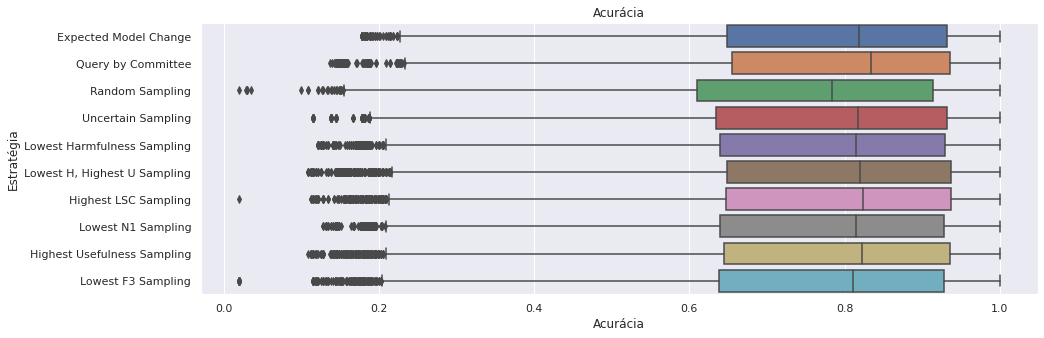

In [39]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h") \
.set(xlabel='Acurácia', ylabel='Estratégia', title = "Acurácia")

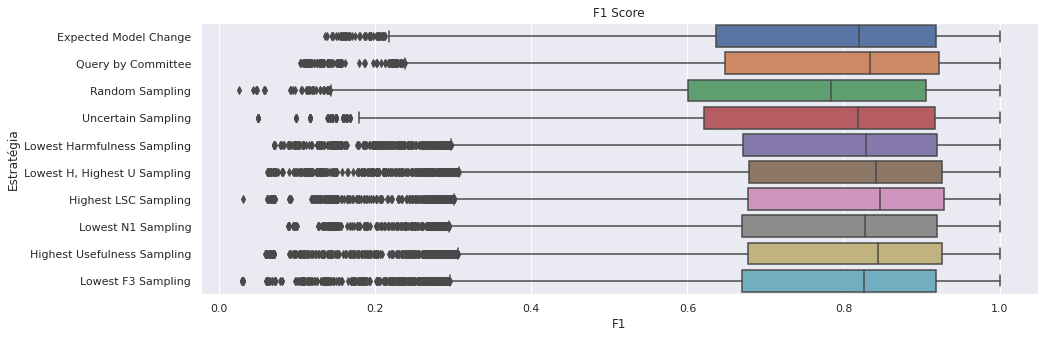

In [40]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h") \
.set(xlabel='F1', ylabel='Estratégia', title = "F1 Score")

## Testes (lineplot)

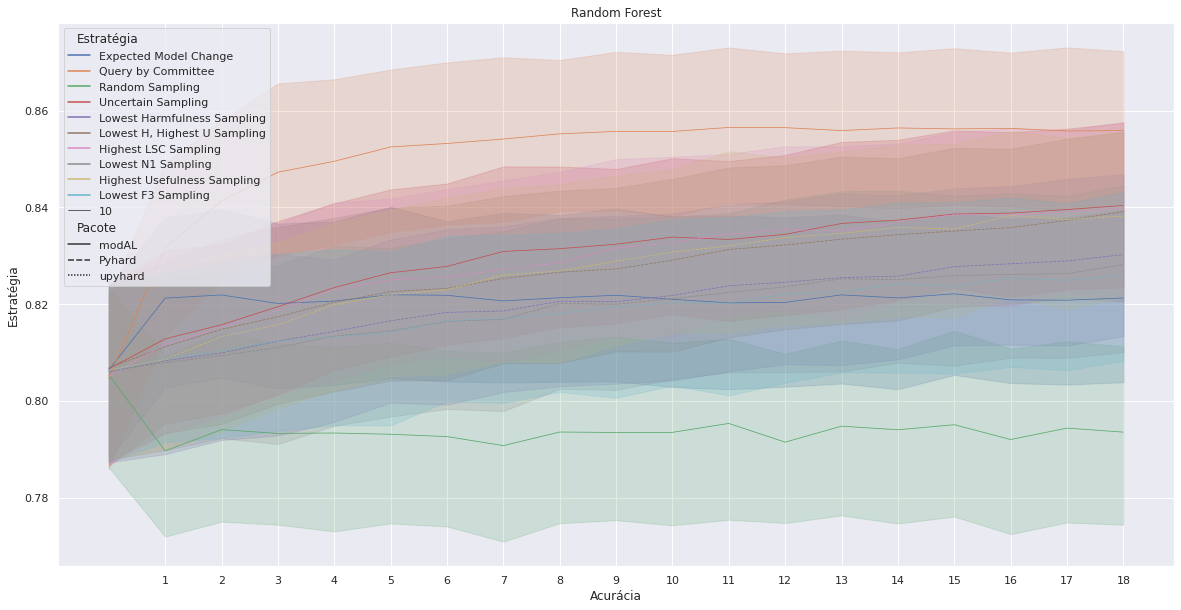

In [41]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "RF")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data, size=10).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "Random Forest")

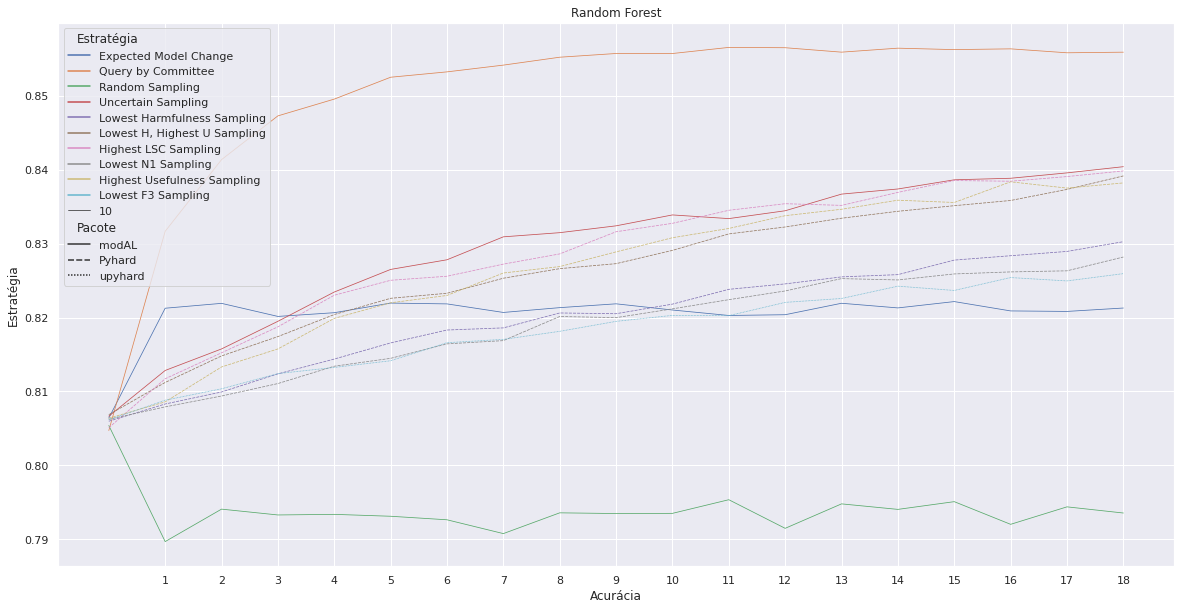

In [42]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "RF")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", ci=None, data = data, size=10).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "Random Forest")

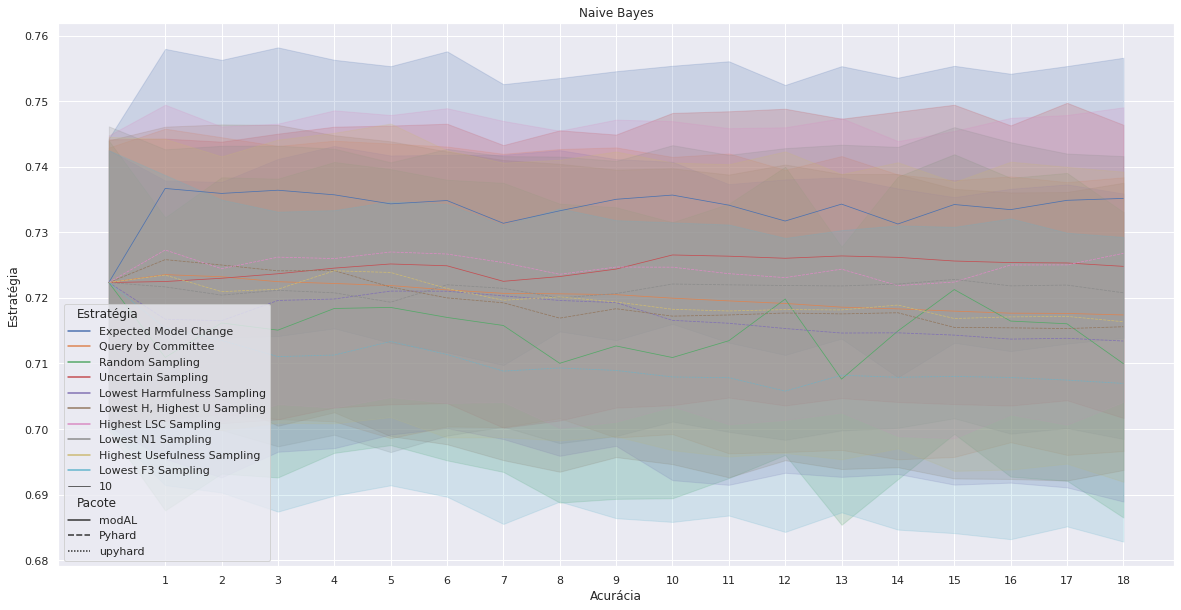

In [43]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "NB")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data, size=10).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "Naive Bayes")

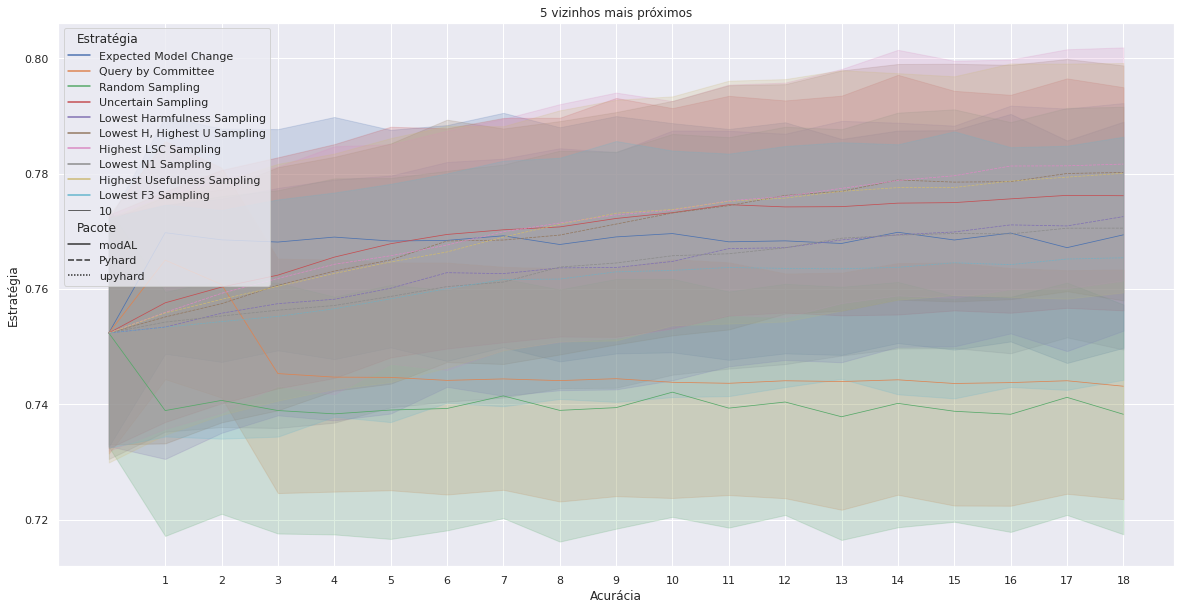

In [44]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "5NN")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data, size=10).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "5 vizinhos mais próximos")

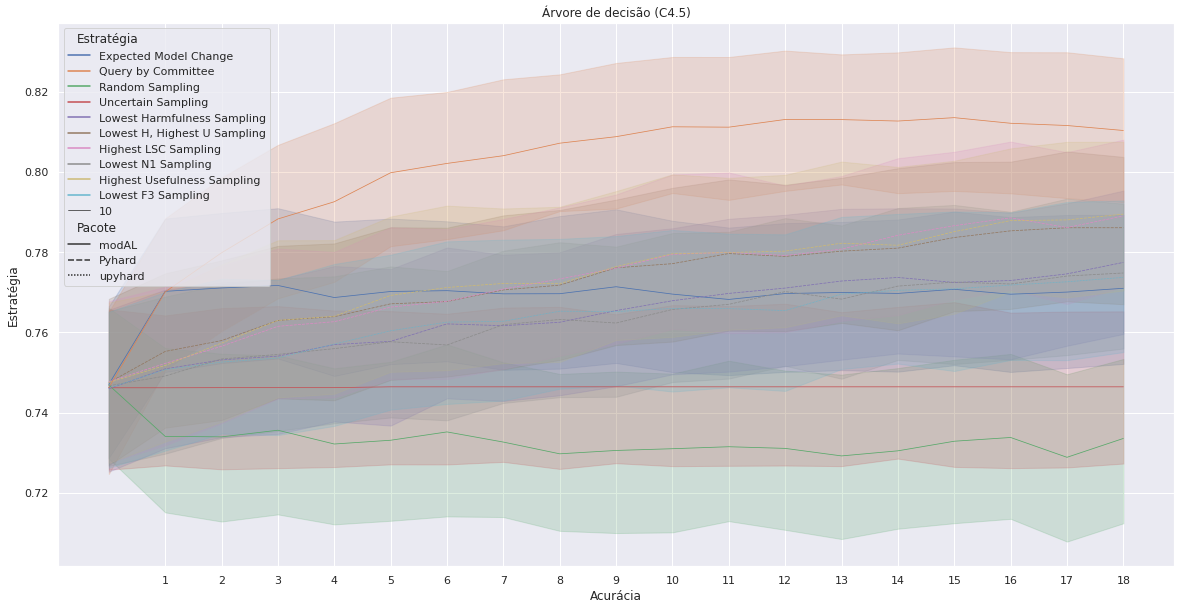

In [45]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "C4.5")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data, size=10).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "Árvore de decisão (C4.5)")

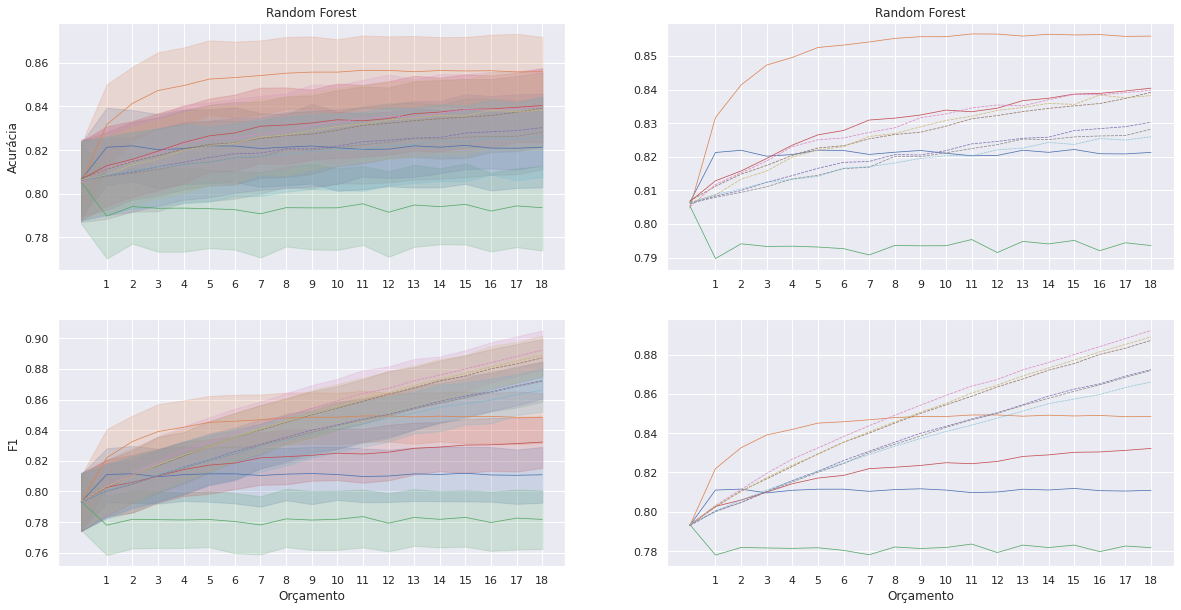

In [46]:
data = df_all[(df_all.classifier == "RF")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data, size=10, ax=axs[0, 0], legend = False).set(xlabel='', ylabel='Acurácia', xticks = range(1,19), title = "Random Forest")
sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", ci=None, data = data, size=10, ax=axs[0, 1], legend = False).set(xlabel='', ylabel='', xticks = range(1,19), title = "Random Forest")
sns.lineplot(x="Orçamento", y="F1", hue="Estratégia", style="Pacote", data = data, size=10, ax=axs[1, 0], legend = False).set(xlabel='Orçamento', ylabel='F1', xticks = range(1,19), title = "")
sns.lineplot(x="Orçamento", y="F1", hue="Estratégia", style="Pacote", ci=None, data = data, size=10, ax=axs[1, 1], legend = False).set(xlabel='Orçamento', ylabel='', xticks = range(1,19), title = "")
plt.show()

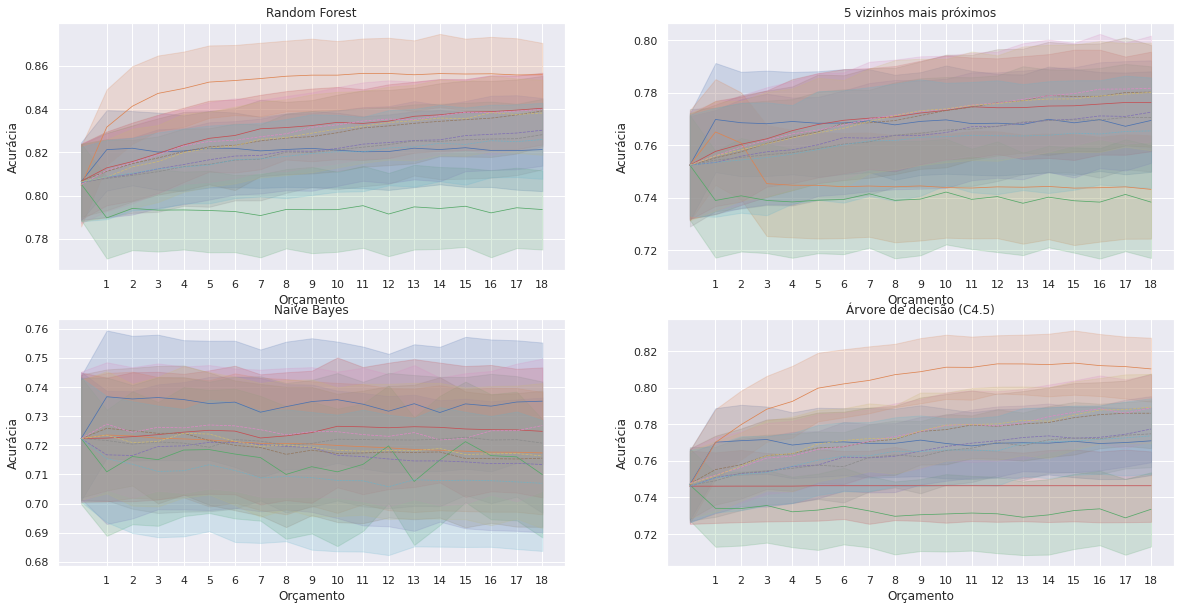

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", data=df_all[(df_all.classifier == "RF")], size=10, ax=axs[0, 0], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "Random Forest")
sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", data=df_all[(df_all.classifier == "5NN")], size=10, ax=axs[0, 1], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "5 vizinhos mais próximos")
sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", data=df_all[(df_all.classifier == "NB")], size=10, ax=axs[1, 0], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "Naive Bayes")
sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", data=df_all[(df_all.classifier == "C4.5")], size=10, ax=axs[1, 1], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "Árvore de decisão (C4.5)")

plt.show()

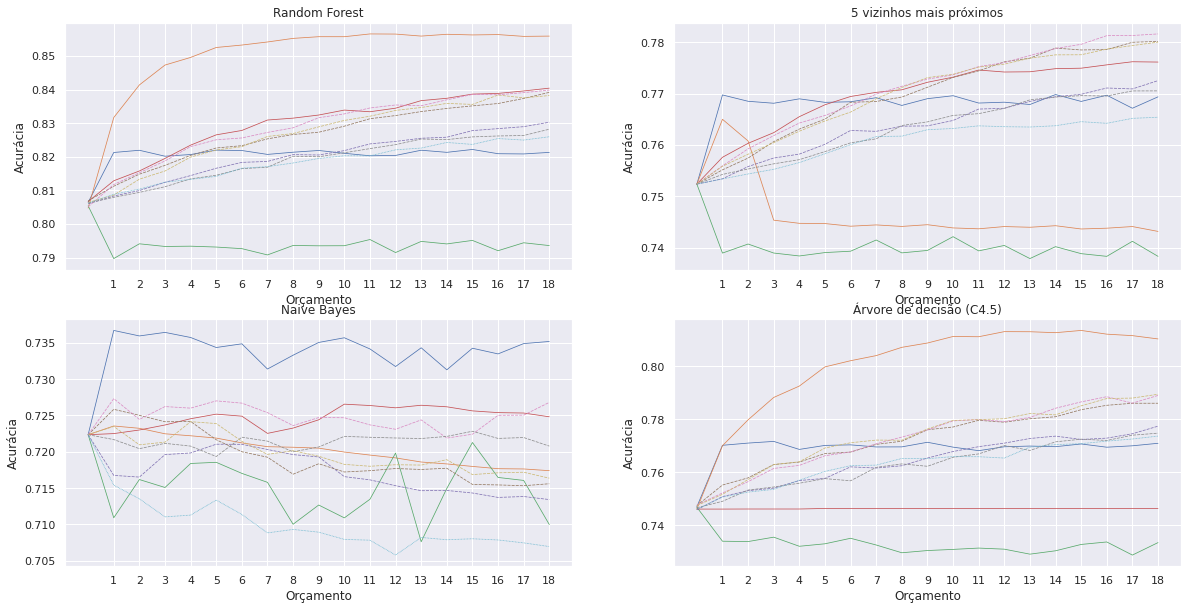

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", ci = None, data=df_all[(df_all.classifier == "RF")], size=10, ax=axs[0, 0], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "Random Forest")
sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", ci = None, data=df_all[(df_all.classifier == "5NN")], size=10, ax=axs[0, 1], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "5 vizinhos mais próximos")
sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", ci = None, data=df_all[(df_all.classifier == "NB")], size=10, ax=axs[1, 0], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "Naive Bayes")
sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", ci = None, data=df_all[(df_all.classifier == "C4.5")], size=10, ax=axs[1, 1], legend = False).set(xlabel='Orçamento', ylabel='Acurácia', xticks = range(1,19), title = "Árvore de decisão (C4.5)")

plt.show()

## Heatmap

In [54]:
df_all.groupby(['strategy','classifier']).std() \
.reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1,Orçamento
0,Expected Model Change,5NN,39.209054,0.341987,0.184083,0.186015,5.477662
1,Expected Model Change,C4.5,12.884052,0.281499,0.174394,0.175045,5.477662
2,Expected Model Change,NB,12.367633,0.281262,0.197849,0.206796,5.477662
3,Expected Model Change,RF,12.788433,0.289769,0.162742,0.166445,5.477662
4,Highest LSC Sampling,5NN,69.231518,0.009039,0.188902,0.184493,5.477662
5,Highest LSC Sampling,C4.5,51.603530,0.009039,0.178050,0.158113,5.477662
6,Highest LSC Sampling,NB,375.346561,0.009039,0.206096,0.213513,5.477662
7,Highest LSC Sampling,RF,71.839109,0.009039,0.164373,0.146446,5.477662
8,Highest Usefulness Sampling,5NN,68.642645,0.009039,0.189185,0.185082,5.477662
9,Highest Usefulness Sampling,C4.5,48.671804,0.009039,0.178338,0.158471,5.477662


[Text(0.5, 21.5, 'Classificador'),
 Text(111.49999999999999, 0.5, 'Estratégia'),
 Text(0.5, 1.0, 'Acurácia')]

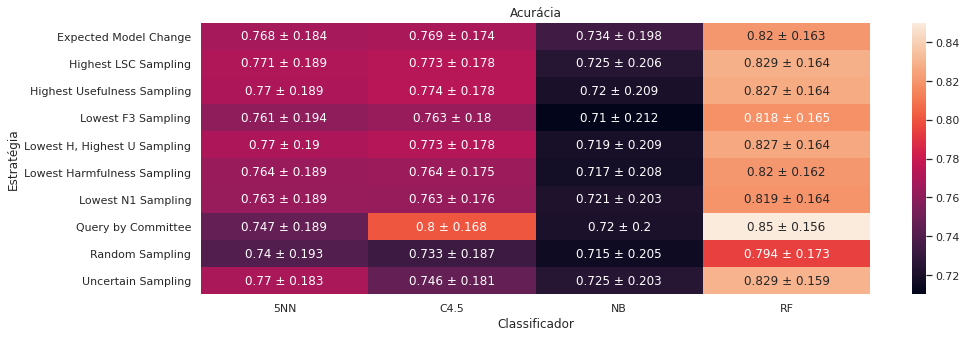

In [67]:
X = pd.pivot_table(df_all, values='accuracy_history', index=['strategy'], columns='classifier')
Y = pd.pivot_table(df_all.groupby(['strategy','classifier']).mean(), values='accuracy_history', index=['strategy'], columns='classifier')
Z = pd.pivot_table(df_all.groupby(['strategy','classifier']).std(), values='accuracy_history', index=['strategy'], columns='classifier')

R = Y[:]
for col in Z.columns:
    R[col] = Y[col].round(3).astype(str) + " ± " + Z[col].round(3).astype(str)

sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(X, annot=False).set(xlabel='Classificador', ylabel='Estratégia', title = "Acurácia")
sns.heatmap(X, annot=R, fmt="", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "Acurácia")
#sns.heatmap(X, annot=Z, annot_kws={'va':'top'}, fmt=".2f", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1")

[Text(0.5, 21.5, 'Classificador'),
 Text(111.49999999999999, 0.5, 'Estratégia'),
 Text(0.5, 1.0, 'F1 Score')]

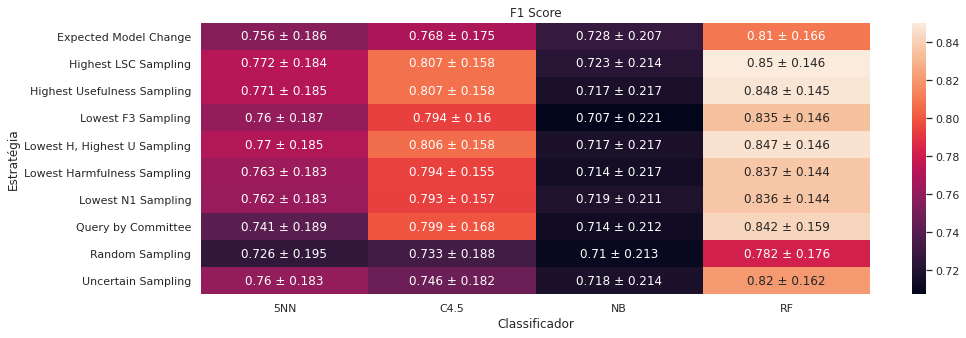

In [68]:
X = pd.pivot_table(df_all, values='f1_history', index=['strategy'], columns='classifier')
Y = pd.pivot_table(df_all.groupby(['strategy','classifier']).mean(), values='f1_history', index=['strategy'], columns='classifier')
Z = pd.pivot_table(df_all.groupby(['strategy','classifier']).std(), values='f1_history', index=['strategy'], columns='classifier')

R = Y[:]
for col in Z.columns:
    R[col] = Y[col].round(3).astype(str) + " ± " + Z[col].round(3).astype(str)

sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(X, annot=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1 Score")
sns.heatmap(X, annot=R, fmt="", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1 Score")
#sns.heatmap(X, annot=Z, annot_kws={'va':'top'}, fmt=".2f", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1")

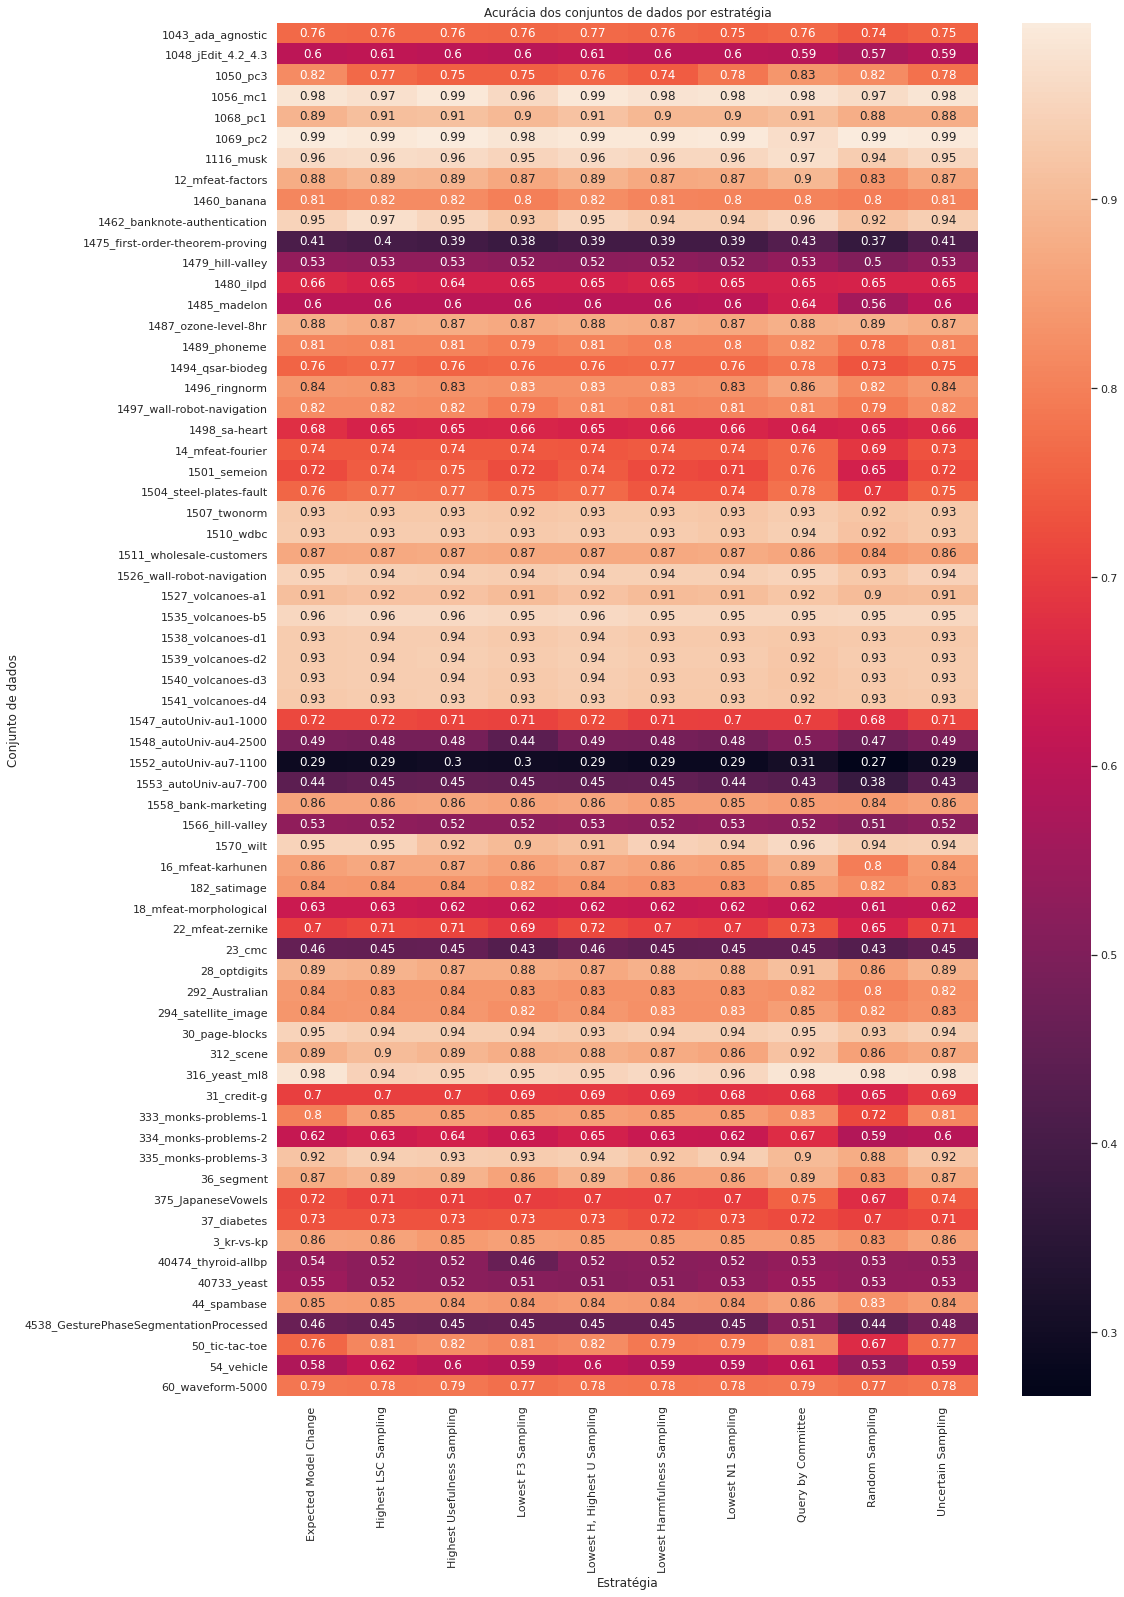

In [57]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
heatmap_data = pd.pivot_table(df_all, values='accuracy_history', index=['dataset'], columns='strategy')

_ = sns.heatmap(heatmap_data, annot=True).set(xlabel='Estratégia', ylabel='Conjunto de dados', title = "Acurácia dos conjuntos de dados por estratégia")

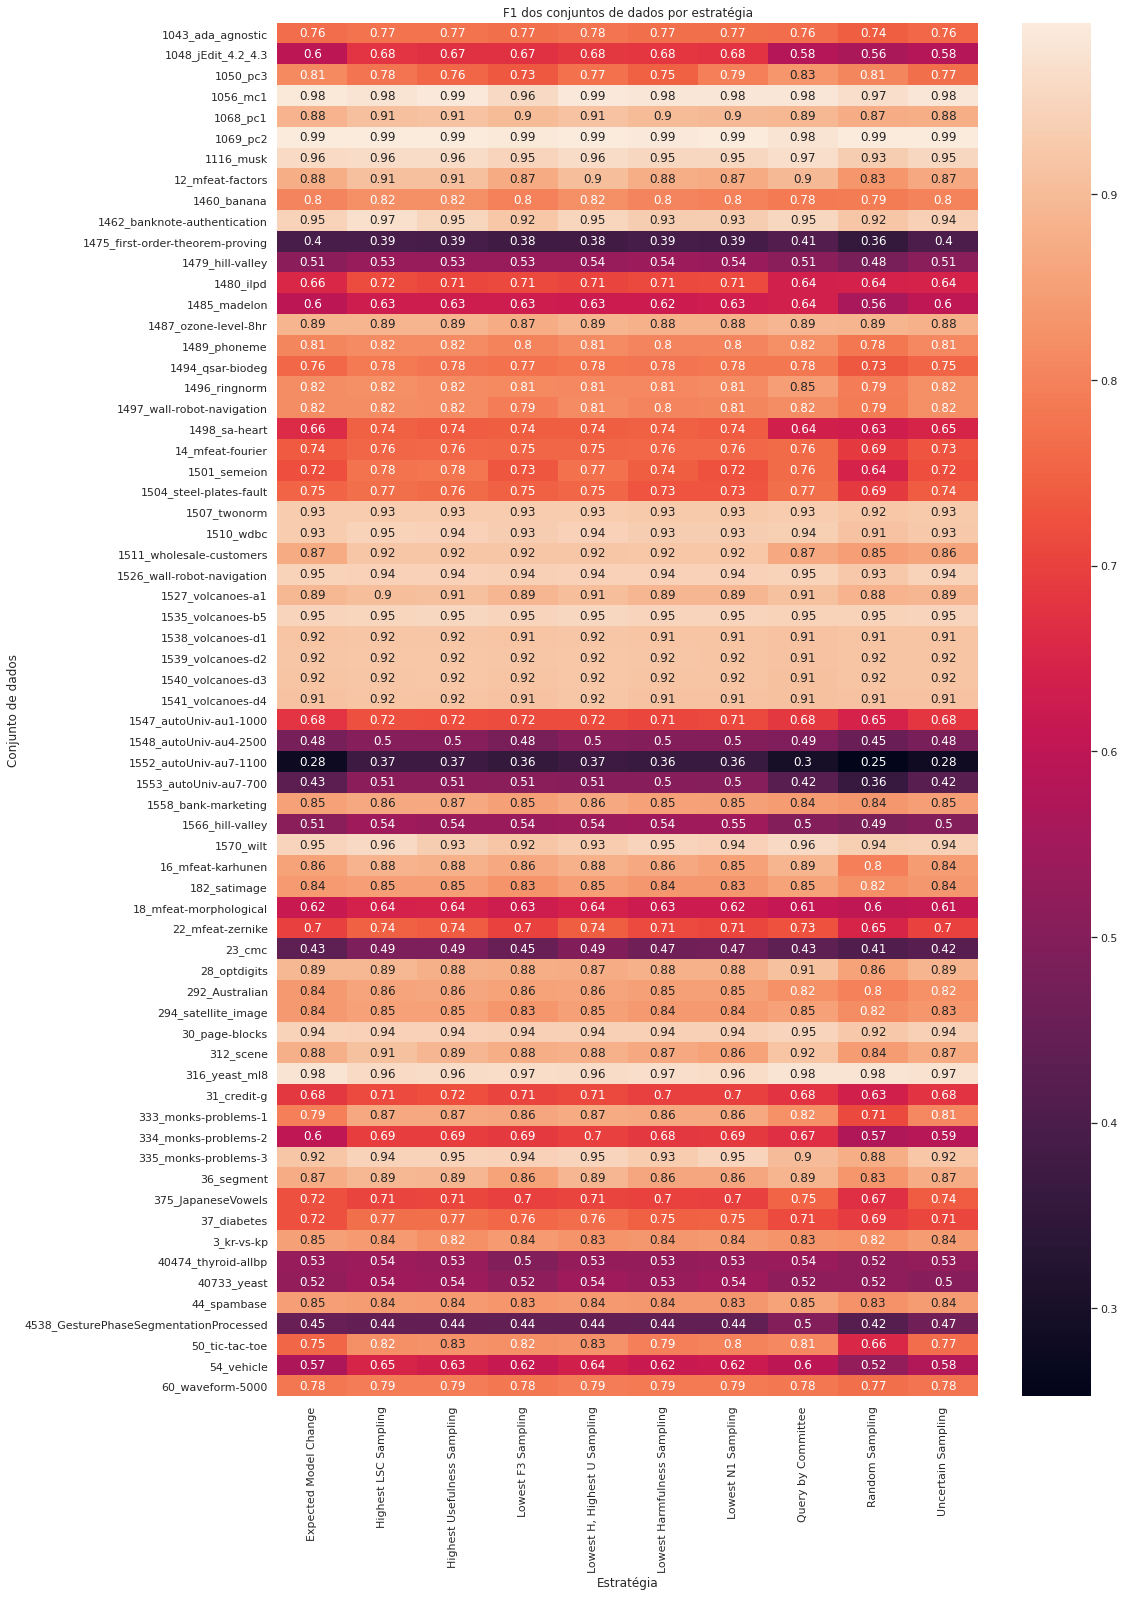

In [58]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
heatmap_data = pd.pivot_table(df_all, values='f1_history', index=['dataset'], columns='strategy')

_ = sns.heatmap(heatmap_data, annot=True).set(xlabel='Estratégia', ylabel='Conjunto de dados', title = "F1 dos conjuntos de dados por estratégia")

In [59]:
df = df_all.groupby(['dataset','strategy']).mean()
df["rank"] = df.groupby("dataset")["accuracy_history"].rank(ascending = False)
#df.groupby('strategy').mean()
df.head(30)

time_elapsed  sample_size  \
dataset            strategy                                                  
1043_ada_agnostic  Expected Model Change            35.591155     0.662078   
                   Highest LSC Sampling            149.691517     0.997534   
                   Highest Usefulness Sampling     148.862666     0.997534   
                   Lowest F3 Sampling              154.697651     0.997534   
                   Lowest H, Highest U Sampling    152.469407     0.997534   
                   Lowest Harmfulness Sampling     146.551133     0.997534   
                   Lowest N1 Sampling              147.939216     0.997534   
                   Query by Committee              523.238501     2.339763   
                   Random Sampling                  22.391826     0.991232   
                   Uncertain Sampling               15.680335     0.232891   
1048_jEdit_4.2_4.3 Expected Model Change            14.641772     0.549729   
                   Highest LSC Sampling            920.822001     0.952542   
                   Highest Usefulness Sampling     148.300986     0.952542   
                   Lowest F3 Sampling              124.786259     0.952542   
                   Lowest H, Highest U Sampling    146.838701     0.952542   
                   Lowest Harmfulness Sampling     154.181268     0.952542   
                   Lowest N1 Sampling              149.579236     0.952542   
                   Query by Committee              244.678477     2.341463   
                   Random Sampling                  12.089879     1.102981   
                   Uncertain Sampling                7.643563     0.348916   
1050_pc3           Expected Model Change            22.305319     0.433781   
                   Highest LSC Sampling            201.194452     0.992800   
                   Highest Usefulness Sampling     173.204235     0.992800   
                   Lowest F3 Sampling              138.799117     0.992800   
                   Lowest H, Highest U Sampling    186.418944     0.992800   
                   Lowest Harmfulness Sampling     172.900441     0.992800   
                   Lowest N1 Sampling              195.083892     0.992800   
                   Query by Committee              331.618745     2.349328   
                   Random Sampling                  16.269571     1.012796   
                   Uncertain Sampling                7.978815     0.168426   

                                                 accuracy_history  f1_history  \
dataset            strategy                                                     
1043_ada_agnostic  Expected Model Change                 0.764412    0.764901   
                   Highest LSC Sampling                  0.760575    0.774236   
                   Highest Usefulness Sampling           0.761930    0.774752   
                   Lowest F3 Sampling                    0.758249    0.768123   
                   Lowest H, Highest U Sampling          0.765717    0.777848   
                   Lowest Harmfulness Sampling           0.758402    0.768132   
                   Lowest N1 Sampling                    0.754321    0.767108   
                   Query by Committee                    0.762633    0.764390   
                   Random Sampling                       0.742549    0.741533   
                   Uncertain Sampling                    0.754430    0.756264   
1048_jEdit_4.2_4.3 Expected Model Change                 0.601920    0.597273   
                   Highest LSC Sampling                  0.608748    0.678493   
                   Highest Usefulness Sampling           0.603414    0.674103   
                   Lowest F3 Sampling                    0.596586    0.672313   
                   Lowest H, Highest U Sampling          0.606366    0.684472   
                   Lowest Harmfulness Sampling           0.598400    0.680851   
                   Lowest N1 Sampling                    0.597795    0.676681   
             

In [60]:
df.groupby('strategy').mean().rank(method = 'first',ascending=True).sort_values(by='rank', ascending=True)['rank']

strategy
Highest LSC Sampling             1.0
Expected Model Change            2.0
Query by Committee               3.0
Highest Usefulness Sampling      4.0
Lowest H, Highest U Sampling     5.0
Uncertain Sampling               6.0
Lowest Harmfulness Sampling      7.0
Lowest N1 Sampling               8.0
Lowest F3 Sampling               9.0
Random Sampling                 10.0
Name: rank, dtype: float64